# Music and the Brain 
## 0. Setup and load data from 0.[decoding]feature-extraction notebook.

In [3]:
import os 
import pickle
import nilearn
import joblib as jl

import numpy as np
import pandas as pd

import nibabel as nib

from nilearn import plotting
from nilearn import image
from nilearn.image import concat_imgs, mean_img
from nilearn.plotting import plot_anat, plot_img, plot_stat_map

In [4]:
# Set the path to the data directory
src_dir = '../data/derivatives/nilearn'

# Set the participant and session IDs
part_id = ['sub-01', 'sub-02', 'sub-03', 'sub-04', 'sub-05', 'sub-06', 'sub-07', 'sub-08', 'sub-09', 'sub-10']
ses_id = 'ses-01'


In [5]:
func_dir = "..\data"

func_runs_all = []


for id in part_id:
    #funcdir_path.append(os.path.join(func_dir, id, ses_id, 'func'))  # Append to list
    funcdir_path= os.path.join(func_dir, id, ses_id, 'func')
    func_runs = os.listdir(funcdir_path)
    func_runs = [f for f in func_runs if f.endswith('bold.nii.gz')]
    func_runs_all.extend(func_runs)
    

print(func_runs_all)
print(funcdir_path)

['sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-01_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-01_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-01_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-02_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-02_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-02_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-02_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-03_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-03_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-03_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', 'sub-03_ses-01_task-

In [6]:
c_func_runs_all = []

for id in part_id:
    #funcdir_path.append(os.path.join(func_dir, id, ses_id, 'func'))  # Append to list
    funcdir_path= os.path.join(func_dir, id, ses_id, 'func')
    func_runs = os.listdir(funcdir_path)
    func_runs = [f for f in func_runs if f.endswith('bold.nii.gz')]

    c_func_runs = [os.path.join(funcdir_path, f) for f in func_runs]
    c_func_runs_all.extend(c_func_runs)

In [7]:
from nilearn.masking import compute_epi_mask, compute_multi_epi_mask

print(c_func_runs_all)
mask_img = compute_multi_epi_mask(c_func_runs_all)


['..\\data\\sub-01\\ses-01\\func\\sub-01_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-01\\ses-01\\func\\sub-01_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-01\\ses-01\\func\\sub-01_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-01\\ses-01\\func\\sub-01_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-02\\ses-01\\func\\sub-02_ses-01_task-02a_run-1_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-02\\ses-01\\func\\sub-02_ses-01_task-02a_run-2_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-02\\ses-01\\func\\sub-02_ses-01_task-02a_run-3_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-02\\ses-01\\func\\sub-02_ses-01_task-02a_run-4_space-MNI152NLin2009cAsym_res-2_desc-preproc_bold.nii.gz', '..\\data\\sub-03\\ses-01\\func

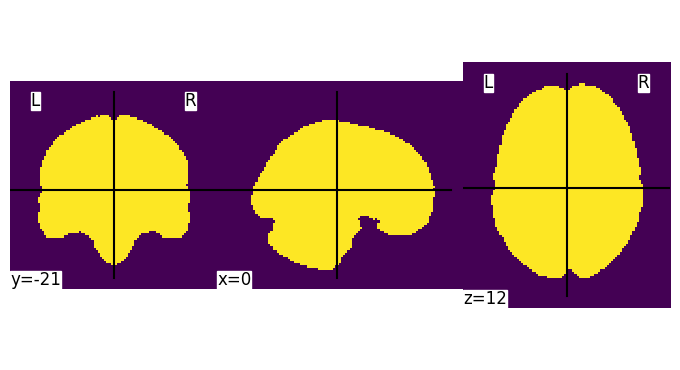

In [8]:
plot_img(mask_img)

In [9]:
data_dir = []

for id in part_id:
    data_dir.append(os.path.join(src_dir, id, ses_id))  # Append to list

In [10]:
print(data_dir)

['../data/derivatives/nilearn\\sub-01\\ses-01', '../data/derivatives/nilearn\\sub-02\\ses-01', '../data/derivatives/nilearn\\sub-03\\ses-01', '../data/derivatives/nilearn\\sub-04\\ses-01', '../data/derivatives/nilearn\\sub-05\\ses-01', '../data/derivatives/nilearn\\sub-06\\ses-01', '../data/derivatives/nilearn\\sub-07\\ses-01', '../data/derivatives/nilearn\\sub-08\\ses-01', '../data/derivatives/nilearn\\sub-09\\ses-01', '../data/derivatives/nilearn\\sub-10\\ses-01']


In [11]:
X_total = []
target_total = []

for i in range(1, len(data_dir)):

    # Load feature set.
    X=image.load_img(os.path.join(data_dir[i], f'{part_id[i]}_{ses_id}_task-02a-MVPA-12sBOLD_clean.nii.gz'))
    print(os.path.join(data_dir[i], f'{part_id[i]}_{ses_id}_task-02a-MVPA-12sBOLD_clean.nii.gz'))

    X_total.append(X)

    
    # Load csv file with targets.
    target_set = pd.read_csv(os.path.join(data_dir[i], f'{part_id[i]}_{ses_id}_task-02a-MVPA-12sBOLD_targets_clean.csv'))
    target_total.append(target_set['target'])


   


../data/derivatives/nilearn\sub-02\ses-01\sub-02_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz
../data/derivatives/nilearn\sub-03\ses-01\sub-03_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz
../data/derivatives/nilearn\sub-04\ses-01\sub-04_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz
../data/derivatives/nilearn\sub-05\ses-01\sub-05_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz
../data/derivatives/nilearn\sub-06\ses-01\sub-06_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz
../data/derivatives/nilearn\sub-07\ses-01\sub-07_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz
../data/derivatives/nilearn\sub-08\ses-01\sub-08_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz
../data/derivatives/nilearn\sub-09\ses-01\sub-09_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz
../data/derivatives/nilearn\sub-10\ses-01\sub-10_ses-01_task-02a-MVPA-12sBOLD_clean.nii.gz


# 1. Classification

In [12]:
from nilearn.maskers import NiftiMasker
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneGroupOut

from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.svm import SVC
from sklearn.multiclass import OneVsOneClassifier, OneVsRestClassifier
from sklearn.pipeline import Pipeline

from nilearn.decoding import Decoder
# “background”: Use this option if your images present a clear homogeneous background.
# “whole-brain-template”: This will extract the whole-brain part of your data by resampling 
# the MNI152 brain mask for your data’s field of view.


logo = LeaveOneGroupOut()


In [13]:
print(X_total)
X_total = image.concat_imgs(X_total)
print(X_total.shape)

[<nibabel.nifti1.Nifti1Image object at 0x0000029731FDB310>, <nibabel.nifti1.Nifti1Image object at 0x00000297318B0580>, <nibabel.nifti1.Nifti1Image object at 0x0000029731FE9CA0>, <nibabel.nifti1.Nifti1Image object at 0x000002973196B670>, <nibabel.nifti1.Nifti1Image object at 0x000002973196BA60>, <nibabel.nifti1.Nifti1Image object at 0x000002973196B4F0>, <nibabel.nifti1.Nifti1Image object at 0x000002973196B220>, <nibabel.nifti1.Nifti1Image object at 0x0000029731970670>, <nibabel.nifti1.Nifti1Image object at 0x0000029731970C70>]
(97, 115, 97, 684)


In [14]:
print(target_total)
target_total = pd.concat(target_total).values

[0      Noise_ToDiscard
1         Peacefulness
2         Peacefulness
3           Tenderness
4           Tenderness
            ...       
71       Transcendence
72    JoyfulActivation
73    JoyfulActivation
74              Wonder
75              Wonder
Name: target, Length: 76, dtype: object, 0     Noise_ToDiscard
1       Transcendence
2       Transcendence
3          Tenderness
4          Tenderness
           ...       
71       Peacefulness
72              Power
73              Power
74          Nostalgia
75          Nostalgia
Name: target, Length: 76, dtype: object, 0     Noise_ToDiscard
1              Wonder
2              Wonder
3             Tension
4             Tension
           ...       
71          Nostalgia
72              Power
73              Power
74            Sadness
75            Sadness
Name: target, Length: 76, dtype: object, 0     Noise_ToDiscard
1        Peacefulness
2        Peacefulness
3             Tension
4             Tension
           ...       
71     

In [15]:
y = list(target_total)
print(y)

# transform the target_set unique strings to integers
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

print(y)


['Noise_ToDiscard', 'Peacefulness', 'Peacefulness', 'Tenderness', 'Tenderness', 'Transcendence', 'Transcendence', 'JoyfulActivation', 'JoyfulActivation', 'Power', 'Power', 'Nostalgia', 'Nostalgia', 'Tension', 'Tension', 'Sadness', 'Sadness', 'Wonder', 'Wonder', 'Noise_ToDiscard', 'JoyfulActivation', 'JoyfulActivation', 'Transcendence', 'Transcendence', 'Nostalgia', 'Nostalgia', 'Peacefulness', 'Peacefulness', 'Power', 'Power', 'Sadness', 'Sadness', 'Wonder', 'Wonder', 'Tension', 'Tension', 'Tenderness', 'Tenderness', 'Noise_ToDiscard', 'Transcendence', 'Transcendence', 'Sadness', 'Sadness', 'Nostalgia', 'Nostalgia', 'Wonder', 'Wonder', 'Peacefulness', 'Peacefulness', 'Tenderness', 'Tenderness', 'JoyfulActivation', 'JoyfulActivation', 'Tension', 'Tension', 'Power', 'Power', 'Noise_ToDiscard', 'Peacefulness', 'Peacefulness', 'Tenderness', 'Tenderness', 'Nostalgia', 'Nostalgia', 'Tension', 'Tension', 'Sadness', 'Sadness', 'Power', 'Power', 'Transcendence', 'Transcendence', 'JoyfulActivati

In [16]:
runs_group = np.repeat(np.arange(9), 76)
print(runs_group)
print(np.unique(runs_group))

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3 3 3 3 3 3 3 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5 5
 5 5 5 5 5 5 5 5 5 5 5 5 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6 6
 6 6 6 6 6 6 6 6 6 6 6 6 

In [17]:
print(runs_group.shape)

(684,)


In [18]:
def run_decoder(estimator, mask, cv, X, y, groups, smoothing, scoring, mask_strategy, results_dir, part_id, ses_id):
    """
    Function to fit the Nilearn Decoder, save the model, and organize results into structured directories.
    """
    decoder_name = f"{estimator}_{mask_strategy}_fwhm{smoothing}_{scoring}"
    scoring_dir = os.path.join(results_dir, 'nilearn', part_id, ses_id, scoring)
    decoder_path = os.path.join(scoring_dir, f"{decoder_name}.pkl")
    
    if not os.path.exists(scoring_dir):
        os.makedirs(scoring_dir)
    
    try:
        
        
        # Initialize and fit decoder
        decoder = Decoder(
            estimator=estimator,
            mask=mask,
            cv=cv,
            smoothing_fwhm=smoothing,
            mask_strategy=mask_strategy,
            scoring=scoring,
            standardize=True,
            verbose=0
        )
        decoder.fit(X, y, groups=groups)
        
        # Save decoder
        with open(decoder_path, 'wb') as f:
            pickle.dump(decoder, f)
        print(f"Decoder salvo em: {decoder_path}")
        
        return {
            "Decoder": decoder_name,
            "Smoothing": smoothing,
            "Scoring Method": scoring,
            "Mask Strategy": mask_strategy,
            "Decoder Path": decoder_path
        }
    
    except Exception as e:
        print(f"Erro com {decoder_name}: {e}")
        return {
            "Decoder": decoder_name,
            "Smoothing": smoothing,
            "Scoring Method": scoring,
            "Mask Strategy": mask_strategy,
            "Error": str(e),
            "Decoder Path": decoder_path
        }

In [19]:
def find_all_decoders(base_dir, scoring_methods):
    """
    Procura e carrega automaticamente todos os arquivos .pkl dentro das pastas de scoring (ex: 'roc_auc' ou 'accuracy').

    Args:
        base_dir (str): Diretório base onde estão as pastas de scoring.
        scoring_methods (list): Lista das pastas possíveis de scoring.

    Returns:
        list: Lista de tuples contendo (decoder, decoder_path, scoring_method).
    """
    decoders_list = []

    for method in scoring_methods:
        scoring_path = os.path.join(base_dir, method)

        if os.path.exists(scoring_path):  # Verifica se a pasta existe
            for file in os.listdir(scoring_path):  # Percorre os arquivos
                if file.endswith(".pkl"):  # Procura arquivos .pkl
                    decoder_path = os.path.join(scoring_path, file)
                    try:
                        with open(decoder_path, 'rb') as f:
                            decoder = pickle.load(f)
                        print(f"Decoder carregado de: {decoder_path}")
                        decoders_list.append((decoder, decoder_path, method))  # Armazena o decoder, caminho e a pasta de origem
                    except Exception as e:
                        print(f"Erro ao carregar decoder de {decoder_path}: {e}")

    if decoders_list:
        return decoders_list  # Retorna todos os decoders encontrados
    else:
        print("Nenhum decoder encontrado!")
        return []  # Retorna lista vazia se nada for encontrado


In [20]:
def save_results(decoder, results_dir, part_id, ses_id):
    """Save CV scores and coefficient images."""

    decoder_name = os.path.splitext(os.path.basename(decoder[1]))[0] # Get decoder name from decoder[1] -> path splitext[0] = takes out the .pkl

    # cv_scores_path = os.path.join(results_dir, 'nilearn', part_id, ses_id, 'cv_scores', decoder[2], decoder_name)
    path = os.path.join(results_dir, 'nilearn', part_id, ses_id, decoder[2], decoder_name)

    if not os.path.exists(path):
        os.makedirs(path)

    # if not os.path.exists(coef_imgs_path):
    #     os.makedirs(coef_imgs_path)

    
    
    # Save cross-validation scores

    cv_scores = [decoder[0].cv_scores_[i] for i in range(len(decoder[0].cv_scores_))]

    cv_scores_mean = np.mean(cv_scores, axis=1)

    df = pd.DataFrame(cv_scores_mean, columns=['score'])
    df['label'] = le.classes_ # Use class labels from cv_scores_ keys


    df = pd.DataFrame({'target': le.classes_, 'cv_score': cv_scores_mean})

    csv_path = os.path.join(path, f"{decoder_name}_cv_scores.csv")
    df.to_csv(csv_path, index=False)

    #print(f"Resultados salvos em: {csv_path}")
    
    coef_img = [decoder[0].coef_img_[i] for i in range(len(decoder[0].coef_img_))]

    coef_final_path = os.path.join(path, f"{decoder_name}_coef_img.pkl")

    
    jl.dump(coef_img, coef_final_path)
    
       
    # Save coefficient images
    #coef_imgs = enumerate(decoder[0].coef_img_):

        
        
        
    

In [21]:
def find_all_coefs(base_dir, scoring_methods):
    """
    Recursively searches for .pkl files within scoring method directories and loads them using joblib.

    Args:
        base_dir (str): Base directory where the scoring method folders are located.
        scoring_methods (list): List of scoring method folder names (e.g., 'roc_auc', 'accuracy').

    Returns:
        list: List of tuples containing (coef_img, coef_path, scoring_method).
    """
    coefs_list = []

    for method in scoring_methods:
        scoring_path = os.path.join(base_dir, method)

        if os.path.exists(scoring_path):  # Check if the scoring folder exists
            for root, _, files in os.walk(scoring_path):  # Recursively walk through all subdirectories
                for file in files:
                    if file.endswith(".pkl"):  # Look for .pkl files
                        coef_path = os.path.join(root, file)
                        try:
                            coef_img = jl.load(coef_path)  # Load using joblib
                            print(f"Loaded coefficient from: {coef_path}")
                            coefs_list.append((coef_img, coef_path, method))  # Store coef_img, path, and scoring method
                        except Exception as e:
                            print(f"Error loading coefficient from {coef_path}: {e}")

    if coefs_list:
        return coefs_list  # Return all found coefficients
    else:
        print("No coefficient files found!")
        return []  # Return an empty list if nothing is found


In [22]:
# Definir diretórios e parâmetros
decoders_dir = '../decoders_dir'
part_id = 'subjects_2-10'
ses_id = 'ses-01'
estimators = ['svc_l2']
scoring_metrics = ['roc_auc']
smoothing_values = [4]
mask_strategies = ['gm-template']

all_results = []

for estimator in estimators:
    for scoring_method in scoring_metrics:
        for smoothing in smoothing_values:
            for mask_strategy in mask_strategies:
                result = run_decoder(
                    estimator=estimator,
                    mask=mask_img,
                    cv=logo,
                    X=X_total,
                    y=y,
                    part_id=part_id,
                    ses_id=ses_id,
                    groups=runs_group,
                    smoothing=smoothing,
                    scoring=scoring_method,
                    mask_strategy=mask_strategy,
                    results_dir=decoders_dir,
                )
                # all_results.append(result)

# summary_df = pd.DataFrame(all_results)
# summary_filepath = os.path.join(results_dir, 'decoder_results_summary.csv')
# summary_df.to_csv(summary_filepath, index=False)
# print(f"Resumo salvo em: {summary_filepath}")

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\joblib\memory.py:353: FutureWarning: The default strategy for standardize is currently 'zscore' which incorrectly uses population std to calculate sample zscores. The new strategy 'zscore_sample' corrects this behavior by using the sample std. In release 0.13, the default strategy will be replaced by the new strategy and the 'zscore' option will be removed. Please use 'zscore_sample' instead.
  return self.func(*args, **kwargs)
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to

Decoder salvo em: ../decoders_dir\nilearn\subjects_2-10\ses-01\roc_auc\svc_l2_gm-template_fwhm4_roc_auc.pkl


In [28]:
base_decoder_dir = r"..\decoders_dir\nilearn\subjects_2-10\ses-01"

# Lista das subpastas onde pode estar o decoder
scoring_methods = ["roc_auc"]


# Chama a função para encontrar todos os decoders
decoders = find_all_decoders(base_decoder_dir, scoring_methods)

Decoder carregado de: ..\decoders_dir\nilearn\subjects_2-10\ses-01\roc_auc\svc_l2_gm-template_fwhm4_roc_auc.pkl


In [29]:
if decoders:
    results_dir = '../results_seb'
    part_id = 'subjects_2-10'
    ses_id = 'ses-01'

    for decoder in decoders:

        # Acessa o cv_scores_ corretamente
        save_results(decoder,results_dir, part_id, ses_id)

In [30]:
coef_imgs = jl.load(r'..\results_seb/nilearn/subjects_2-10/ses-01/roc_auc/svc_l2_gm-template_fwhm4_roc_auc/svc_l2_gm-template_fwhm4_roc_auc_coef_img.pkl')
print(coef_imgs)

[<nibabel.nifti1.Nifti1Image object at 0x00000297318C6970>, <nibabel.nifti1.Nifti1Image object at 0x0000029731B3FCD0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731B3F2E0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731BEEEE0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731BEEC40>, <nibabel.nifti1.Nifti1Image object at 0x0000029731BEEC70>, <nibabel.nifti1.Nifti1Image object at 0x0000029731BEEB20>, <nibabel.nifti1.Nifti1Image object at 0x0000029731BEEFD0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84160>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C842E0>]


In [31]:
base_coef_dir= os.path.join(results_dir,'nilearn', part_id, ses_id)

base_coef_dir = r"..\results_seb\nilearn\subjects_2-10\ses-01"
scoring_methods = ["roc_auc"]


coefs = find_all_coefs(base_coef_dir, scoring_methods)

Loaded coefficient from: ..\results_seb\nilearn\subjects_2-10\ses-01\roc_auc\svc_l2_gm-template_fwhm4_roc_auc\svc_l2_gm-template_fwhm4_roc_auc_coef_img.pkl


In [40]:
print(coefs[0][0])

[<nibabel.nifti1.Nifti1Image object at 0x0000029731B60340>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84DF0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84910>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84760>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C845E0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84340>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84B20>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C87100>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C8AAF0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C8ACA0>]


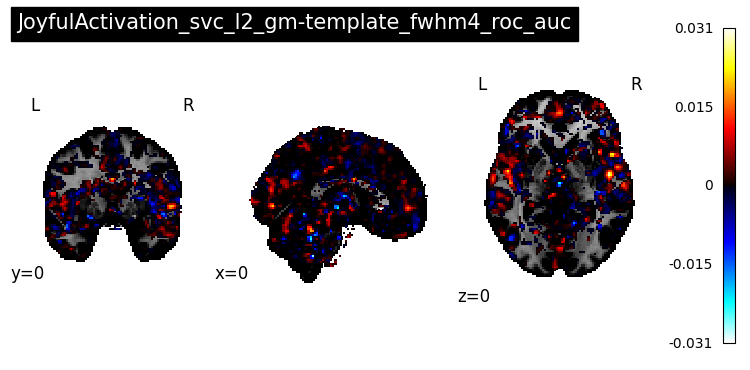

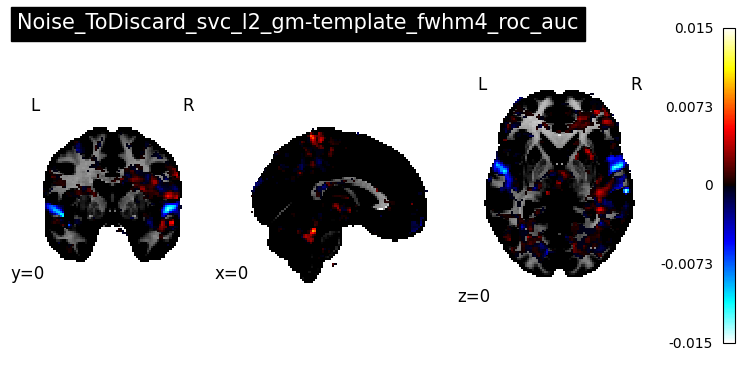

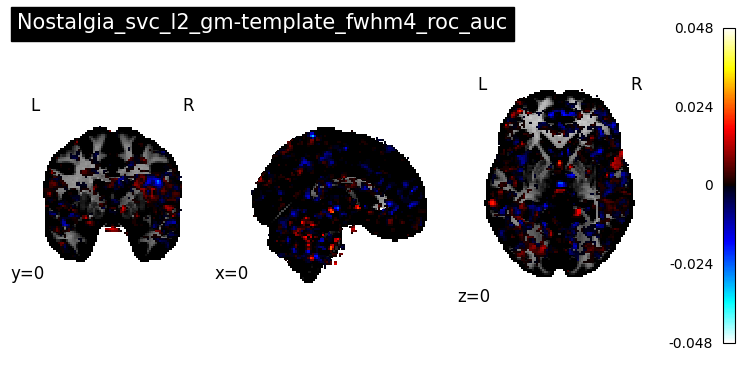

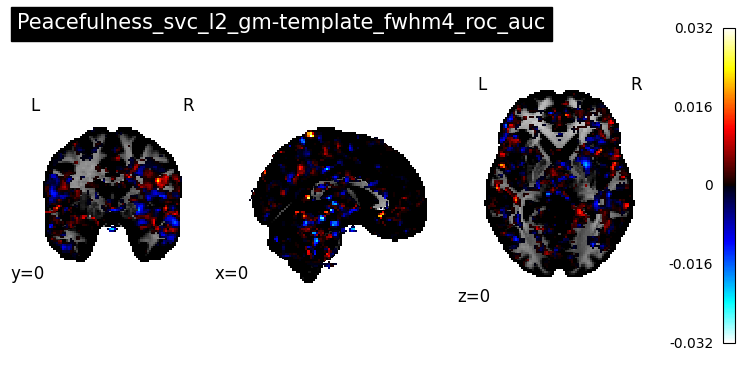

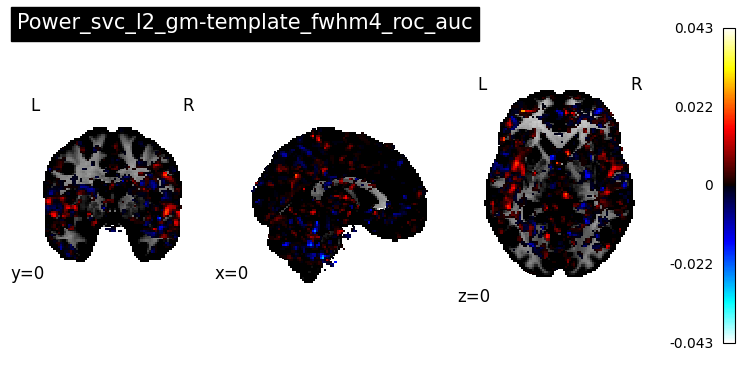

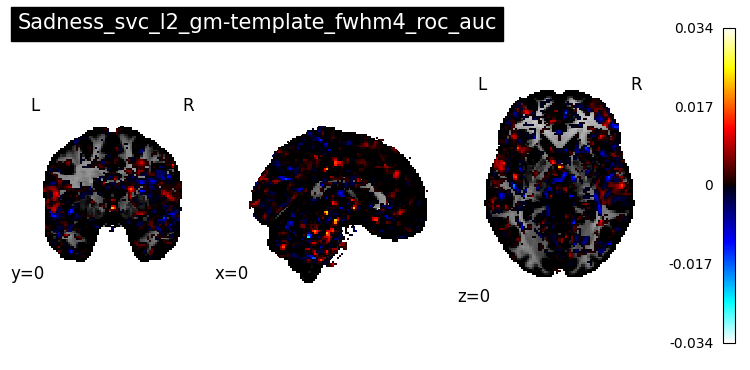

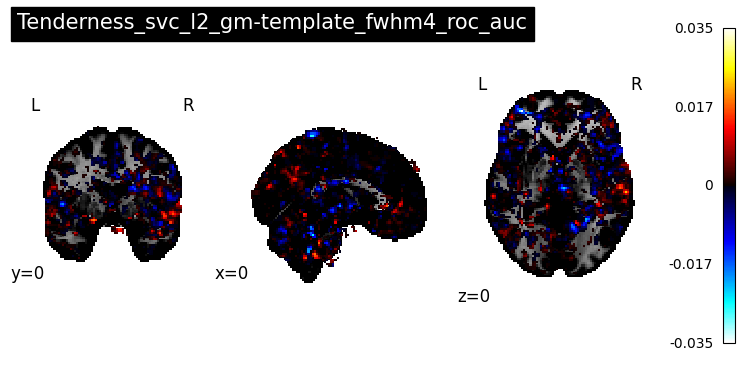

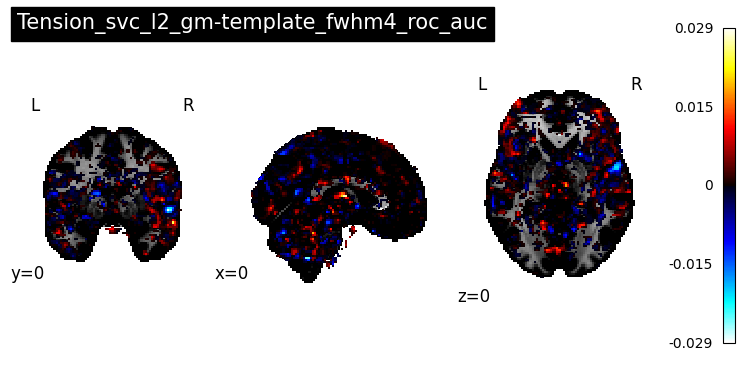

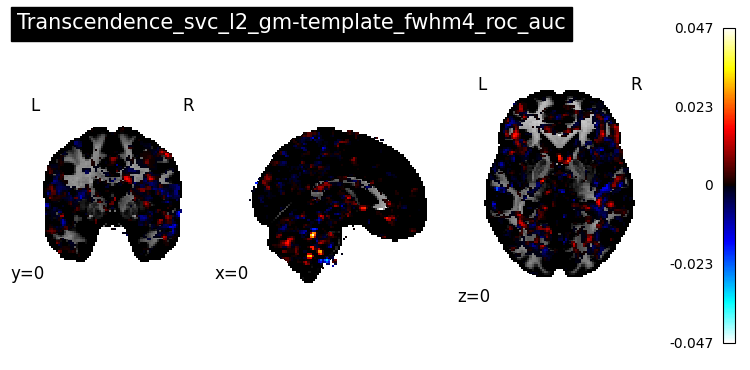

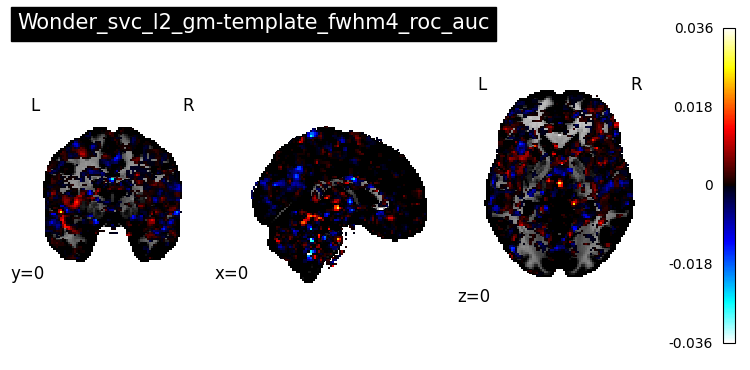

In [41]:
for i in range(len(np.unique(y))):

    # get the indices of the target_set
    idx = np.where(y == i)

    subfolder_name = os.path.basename(os.path.dirname(coefs[0][1]))
    


    # plot the cv_scores_mean_i
    plt = plotting.plot_stat_map(
        coef_imgs[i],
        title=f'{le.inverse_transform([i])[0]}_{subfolder_name}',
        dim=-1,
        threshold='auto',
        cut_coords=(0, 0, 0),
        draw_cross=False,
        
    
        
    )

In [43]:
from nilearn.image import mean_img


# compute sum of all images in list

# for each image in the list extract the data and sum them
imgs = list(coefs[0][0])
print(imgs)


# create list img_data
img_data = []

i = 0
for img in imgs:
    # compute the absolute value of the image data
    img_data.append(np.abs(img.get_fdata()))
    print(img_data[i].shape)

    i += 1




[<nibabel.nifti1.Nifti1Image object at 0x0000029731B60340>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84DF0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84910>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84760>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C845E0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84340>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C84B20>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C87100>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C8AAF0>, <nibabel.nifti1.Nifti1Image object at 0x0000029731C8ACA0>]
(97, 115, 97)
(97, 115, 97)
(97, 115, 97)
(97, 115, 97)
(97, 115, 97)
(97, 115, 97)
(97, 115, 97)
(97, 115, 97)
(97, 115, 97)
(97, 115, 97)


In [44]:
img_data = np.array(img_data)
mean_img_coef = np.sum(img_data, axis=0)
mean_img_coef = nib.Nifti1Image(mean_img_coef, mask_img.affine)

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\numpy\core\fromnumeric.py:771: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



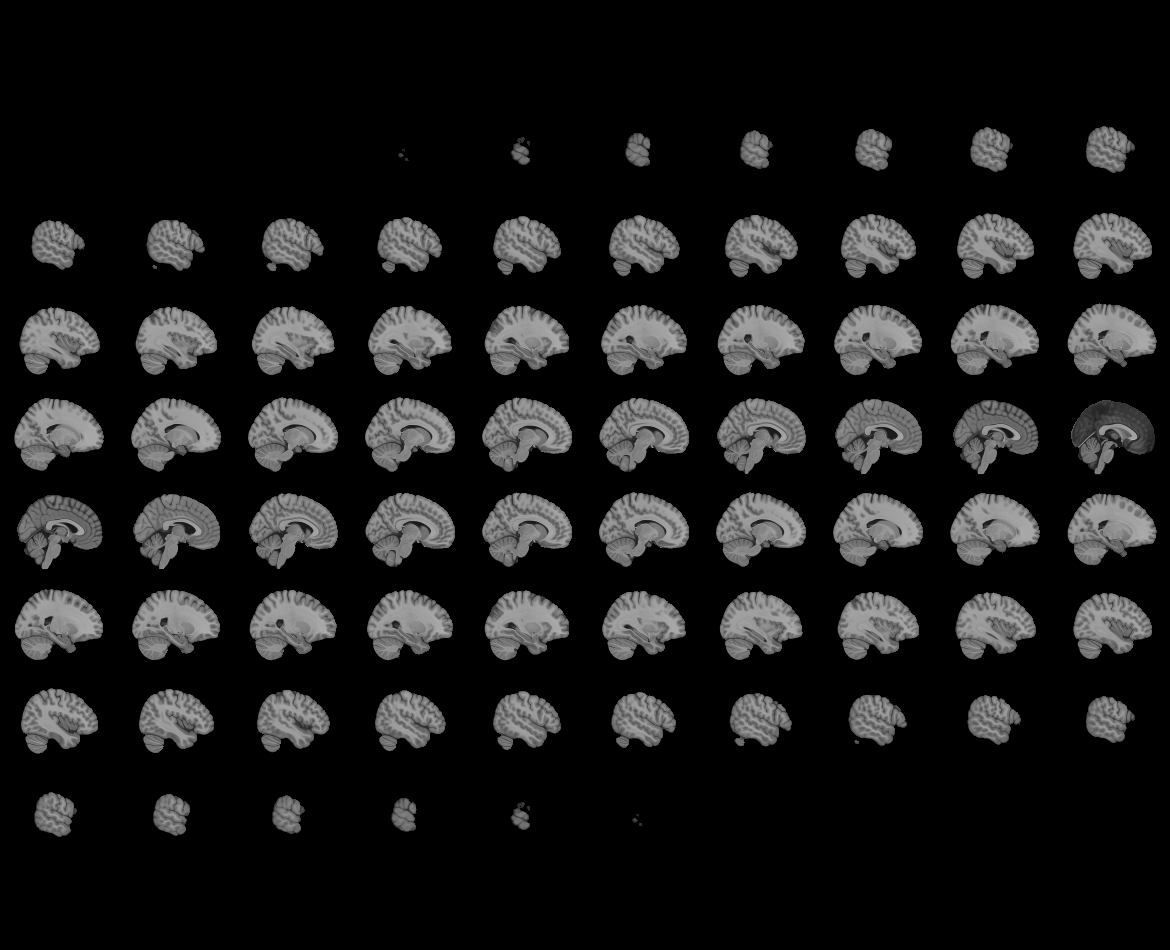
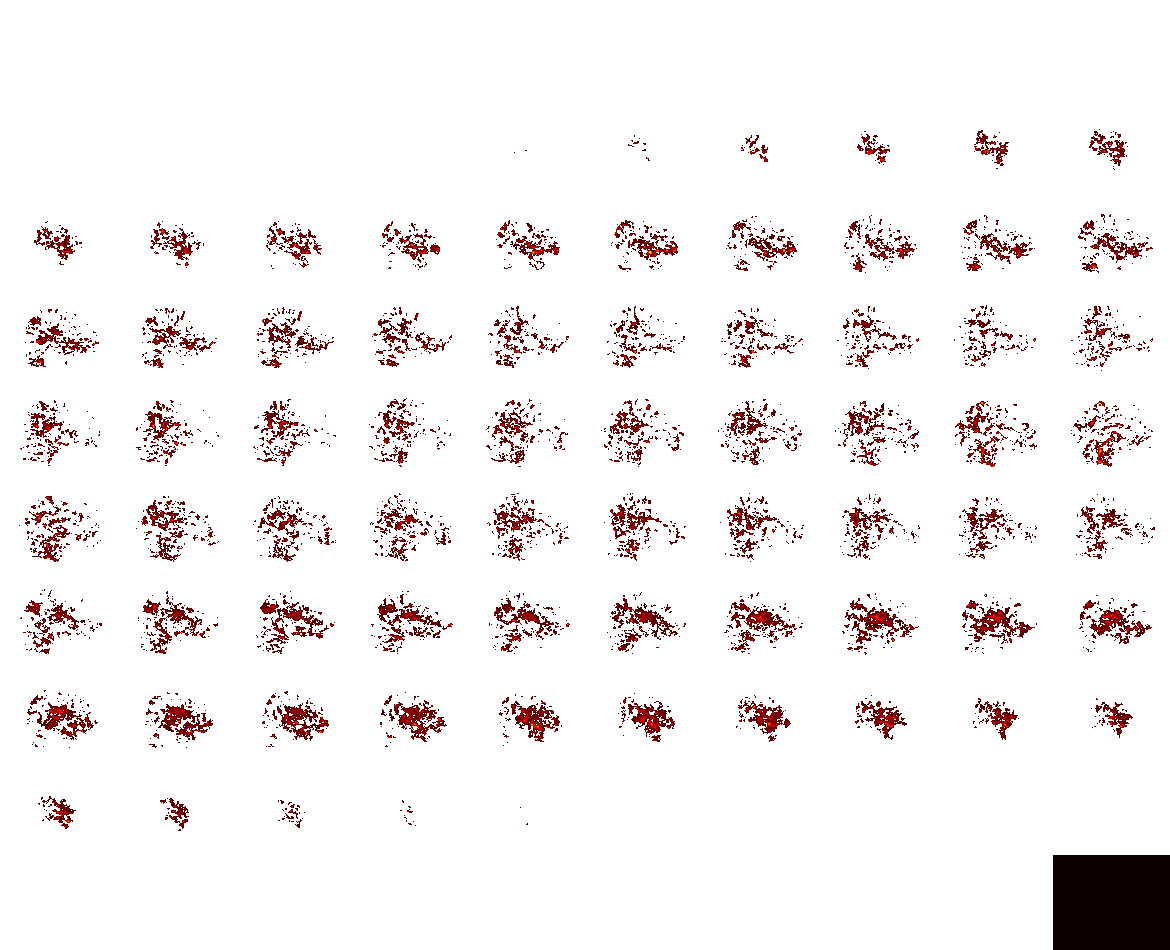

In [45]:
# plot the cv_scores_mean_i
plotting.view_img(
    mean_img_coef,
    title=f'{subfolder_name}',
    threshold="95%",
    cut_coords=(0, 0, 0),
    draw_cross=True,)


# 3. Classification using scikit routines
### Preparing the fmri Data to 2D

In [46]:
masker = NiftiMasker(
    mask_img=mask_img,
    standardize="zscore_sample",
    runs= runs_group,
    smoothing_fwhm = 4,
    memory="nilearn_cache"
    )
X_masked = masker.fit_transform(X_total)

c:\Users\sebas\miniconda3\envs\nilearntest\lib\site-packages\nilearn\maskers\nifti_masker.py:558: UserWarning: Persisting input arguments took 7.53s to run.If this happens often in your code, it can cause performance problems (results will be correct in all cases). The reason for this is probably some large input arguments for a wrapped function.
  data = self._cache(


In [47]:
selector = SelectKBest(f_classif, k=52000)
#using anova as it

In [48]:
svc_ovo = OneVsOneClassifier(
    Pipeline(
        [
            ("anova", selector),
            ("svc", SVC(kernel="linear")),
        ]
    )
)

In [49]:
from sklearn.metrics import roc_auc_score

def roc_auc_score_multiclass(actual_class, pred_class, average, multi_class):

  #creating a set of all the unique classes using the actual class list
  unique_class = set(actual_class)
  roc_auc_dict = {}
  for per_class in unique_class:
    #creating a list of all the classes except the current class 
    other_class = [x for x in unique_class if x != per_class]

    #marking the current class as 1 and all other classes as 0
    new_actual_class = [0 if x in other_class else 1 for x in actual_class]
    new_pred_class = [0 if x in other_class else 1 for x in pred_class]

    #using the sklearn metrics method to calculate the roc_auc_score
    roc_auc = roc_auc_score(new_actual_class, new_pred_class, average = average, multi_class = multi_class)
    roc_auc_dict[per_class] = roc_auc

  return roc_auc_dict

In [50]:
n_splits = len(np.unique(runs_group))

logo = LeaveOneGroupOut()

### Confusion Matrix

In [51]:
from sklearn.metrics import confusion_matrix

accuracy = {}
lr_roc_auc_multiclass  = {}
roc_vals_mc = {}
cm = {}

f=0
for train_index, test_index in logo.split(X_masked, y, groups=runs_group):
    
    
    X_train, X_test = X_masked[train_index], X_masked[test_index]
    y_train, y_test = y[train_index], y[test_index]

    svc_ovo.fit(X_train, y_train)

    y_pred = svc_ovo.predict(X_test)
    

    # compute the confusion matrix
    cm[f] = confusion_matrix(y_test, y_pred)

    # We will store the results in a dictionary for easy access later
    per_class_accuracies = {}

     # Calculate the accuracy for each one of our classes
    for idx, cls in enumerate(set(y_test)):
        # True negatives are all the samples that are not our current GT class (not the current row) and were not predicted as the current class (not the current column)
        true_negatives = np.sum(np.delete(np.delete(cm[f], idx, axis=0), idx, axis=1))
        
        # True positives are all the samples of our current GT class that were predicted as such
        true_positives = cm[f][idx, idx]
        
        # The accuracy for the current class is the ratio between correct predictions to all predictions
        per_class_accuracies[cls] = (true_positives + true_negatives) / np.sum(cm[f])

    accuracy[f] = per_class_accuracies

    roc_vals = roc_auc_score_multiclass(y_test, y_pred, average = 'micro', multi_class = 'ovo')


    lr_roc_auc_multiclass[f] = list(roc_vals.values())


    # roc_vals_mc[f] = roc_auc_score(y_test, y_pred_prob, multi_class='ovr', average='weighted')

    f += 1
    
print(f'Accuracy: {accuracy}')
print(f'ROC AUC: {lr_roc_auc_multiclass}')
   


Accuracy: {0: {0: 0.881578947368421, 1: 0.9736842105263158, 2: 0.7631578947368421, 3: 0.7236842105263158, 4: 0.8289473684210527, 5: 0.8157894736842105, 6: 0.8552631578947368, 7: 0.8157894736842105, 8: 0.7631578947368421, 9: 0.7894736842105263}, 1: {0: 0.7631578947368421, 1: 0.9473684210526315, 2: 0.8947368421052632, 3: 0.75, 4: 0.8026315789473685, 5: 0.8947368421052632, 6: 0.75, 7: 0.8552631578947368, 8: 0.6973684210526315, 9: 0.8552631578947368}, 2: {0: 0.7894736842105263, 1: 0.9473684210526315, 2: 0.868421052631579, 3: 0.8421052631578947, 4: 0.8289473684210527, 5: 0.8026315789473685, 6: 0.8157894736842105, 7: 0.8552631578947368, 8: 0.8421052631578947, 9: 0.7763157894736842}, 3: {0: 0.7763157894736842, 1: 0.9342105263157895, 2: 0.868421052631579, 3: 0.8157894736842105, 4: 0.868421052631579, 5: 0.8947368421052632, 6: 0.7894736842105263, 7: 0.8289473684210527, 8: 0.75, 9: 0.7631578947368421}, 4: {0: 0.8289473684210527, 1: 0.9605263157894737, 2: 0.8421052631578947, 3: 0.8552631578947368,

In [52]:
cv_accuracy = [list(accuracy[i].values()) for i in range(len(accuracy))]


print(cv_accuracy)

[[0.881578947368421, 0.9736842105263158, 0.7631578947368421, 0.7236842105263158, 0.8289473684210527, 0.8157894736842105, 0.8552631578947368, 0.8157894736842105, 0.7631578947368421, 0.7894736842105263], [0.7631578947368421, 0.9473684210526315, 0.8947368421052632, 0.75, 0.8026315789473685, 0.8947368421052632, 0.75, 0.8552631578947368, 0.6973684210526315, 0.8552631578947368], [0.7894736842105263, 0.9473684210526315, 0.868421052631579, 0.8421052631578947, 0.8289473684210527, 0.8026315789473685, 0.8157894736842105, 0.8552631578947368, 0.8421052631578947, 0.7763157894736842], [0.7763157894736842, 0.9342105263157895, 0.868421052631579, 0.8157894736842105, 0.868421052631579, 0.8947368421052632, 0.7894736842105263, 0.8289473684210527, 0.75, 0.7631578947368421], [0.8289473684210527, 0.9605263157894737, 0.8421052631578947, 0.8552631578947368, 0.9078947368421053, 0.881578947368421, 0.6447368421052632, 0.7368421052631579, 0.881578947368421, 0.7763157894736842], [0.6578947368421053, 0.93421052631578

In [53]:
mean_roc_auc = np.mean(list(lr_roc_auc_multiclass.values()), axis=0)

print(f'Mean ROC AUC: {mean_roc_auc}')



# compute mean of the accuracy
mean_accuracy = np.mean(cv_accuracy, axis=0)

print(f'Mean accuracy: {mean_accuracy}')

Mean ROC AUC: [0.5253268  0.6720679  0.51633987 0.49714052 0.50653595 0.47344771
 0.49264706 0.53145425 0.49346405 0.49101307]
Mean accuracy: [0.78654971 0.9502924  0.81432749 0.83479532 0.84064327 0.83625731
 0.77192982 0.83040936 0.79532164 0.79093567]


Text(50.58159722222221, 0.5, 'True')

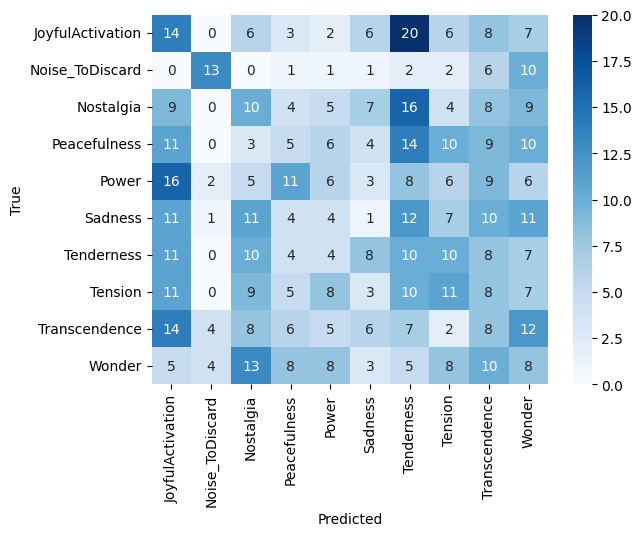

In [54]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

import seaborn as sns

# plot confusion matrix totals
cm_total = np.zeros(cm[0].shape)

for i in range(len(cm)):
    cm_total += cm[i]



sns.heatmap(cm_total, annot= True, fmt='g', cmap='Blues', xticklabels=le.classes_, yticklabels=le.classes_, )

plt.xlabel('Predicted')
plt.ylabel('True')